In [1]:
# keep the URL for future reference
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

In [2]:
# download the csv file
from urllib.request import urlretrieve
urlretrieve(URL,'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x204469e3e10>)

In [3]:
import pandas as pd
data = pd.read_csv('Fremont.csv',index_col='Date',parse_dates=True)
data.head

<bound method NDFrame.head of                      Fremont Bridge East Sidewalk  \
Date                                                
2012-10-03 00:00:00                           9.0   
2012-10-03 01:00:00                           6.0   
2012-10-03 02:00:00                           1.0   
2012-10-03 03:00:00                           3.0   
2012-10-03 04:00:00                           1.0   
2012-10-03 05:00:00                          10.0   
2012-10-03 06:00:00                          50.0   
2012-10-03 07:00:00                          95.0   
2012-10-03 08:00:00                         146.0   
2012-10-03 09:00:00                         104.0   
2012-10-03 10:00:00                          46.0   
2012-10-03 11:00:00                          32.0   
2012-10-03 12:00:00                          41.0   
2012-10-03 13:00:00                          48.0   
2012-10-03 14:00:00                          51.0   
2012-10-03 15:00:00                          92.0   
2012-10-03 16:00

In [4]:
data.describe()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,53271.000000,53271.000000
mean,57.434401,54.368549
std,82.795998,71.282743
min,0.000000,0.000000
25%,7.000000,7.000000
50%,29.000000,30.000000
75%,70.000000,72.000000
max,717.000000,698.000000


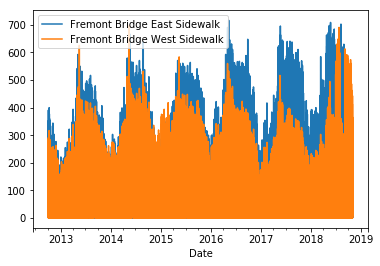

In [8]:
%matplotlib inline
data.plot();         # adding ';' after plot() hides Out[]: <matplotlib.axes._subplots.AxesSubplot at 0x20454eec8d0>

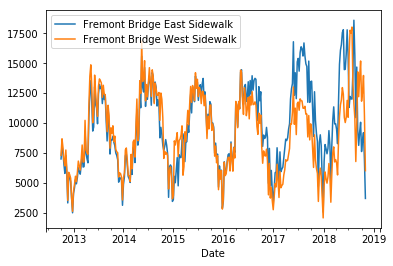

In [7]:
# The previous plot is a bit dense (hourly counts over so many years); 
# we can resample say: weekly and take the sum: get the total number of rides each week
data.resample('W').sum().plot();

In [8]:
pd.date_range?

In [10]:
# change the default matplotlib style then redo the plot
import matplotlib.pyplot as plt
plt.style.use('seaborn')

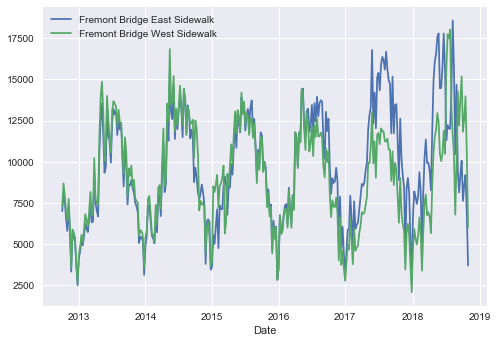

In [11]:
data.resample('W').sum().plot();

In [12]:
# the Legend is a bit verbose; change Columns' names
data.columns = ['West','East']

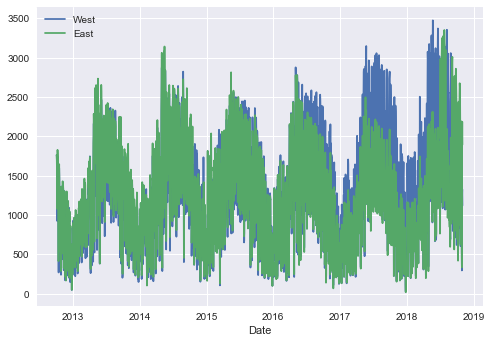

In [13]:
data.resample('D').sum().plot();

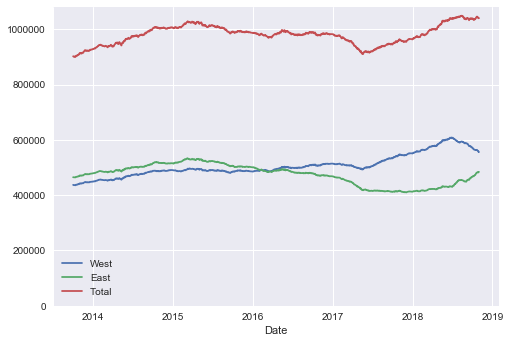

In [33]:
# if we want to see if there is an annual trend in the amount of riders
# for this we use a rolling window; let's resample daily 
ax = data.resample('D').sum().rolling(365).sum().plot()

# adjust the y axis limits
ax.set_ylim(0,None);        # None means "use current maximum"

# each of these points is the sum of rides in the previous 365 days

# the total counts of bikers across the bridge hover around 1 million/year

(0, 1080850.45)

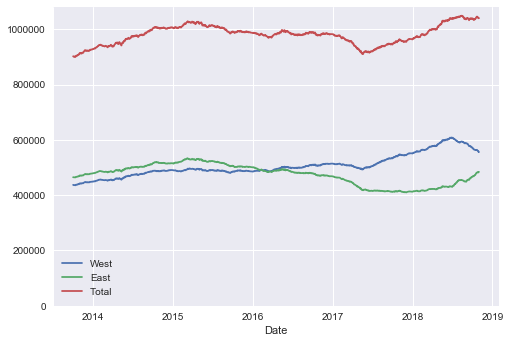

In [19]:
# create new column: 'Total'
data['Total'] = data['West'] + data['East']

ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

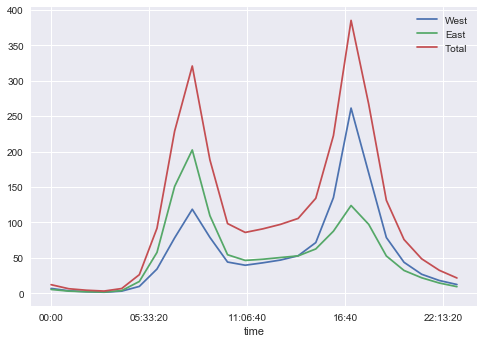

In [27]:
# take a look at the trend within individual days;
# let's group by the time of day and take the mean
data.groupby(data.index.time).mean().plot();

# averaged the number of crossings at each time of the day throughout the year;

# patterns: eastbound sidewalk (green) peaks in the aftrenoon and the westbound sidewalk (blue) peaks in the morning
# the red is a commute pattern; people getting into the city on the west sidewalk in the morning
# and out of the city on the east sidewalk in the afternoon 

In [28]:
# we'd like to see the whole dataset in this way; we can do that using a pivot table: 
pivoted = data.pivot_table('Total',index = data.index.time,columns = data.index.date)

In [29]:
# if we look at just the first five x five block of the pivoted data:
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


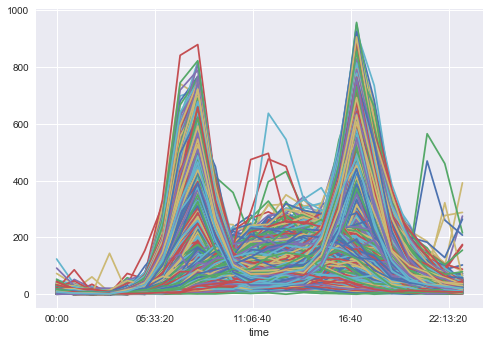

In [34]:
pivoted.plot(legend=False);

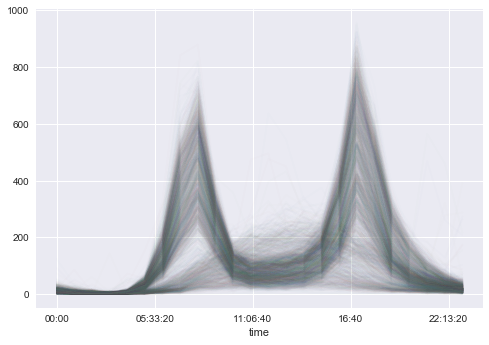

In [36]:
pivoted.plot(legend=False,alpha = 0.01);

In [ ]:
# the best hypothesis here is that these commute days would be week days
# the broad usage days would be weekends or holidays